In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import skew, kurtosis

In [2]:
file_path = '/content/winemag-data-130k-v2.csv'

In [3]:
sns.set(style="whitegrid")

In [4]:
df = pd.read_csv(file_path)

if 'rownames' in df.columns:
    df.drop(['rownames'], axis=1, inplace=True)
    print("'rownames' column has been dropped.")
else:
    print("'rownames' column does not exist in the dataset.")

print(df.head())

'rownames' column does not exist in the dataset.
   id   country                                        description  \
0   0     Italy  Aromas include tropical fruit, broom, brimston...   
1   1  Portugal  This is ripe and fruity, a wine that is smooth...   
2   2        US  Tart and snappy, the flavors of lime flesh and...   
3   3        US  Pineapple rind, lemon pith and orange blossom ...   
4   4        US  Much like the regular bottling from 2012, this...   

                          designation  points  price           province  \
0                        Vulkà Bianco      87    NaN  Sicily & Sardinia   
1                            Avidagos      87   15.0              Douro   
2                                 NaN      87   14.0             Oregon   
3                Reserve Late Harvest      87   13.0           Michigan   
4  Vintner's Reserve Wild Child Block      87   65.0             Oregon   

              region_1           region_2         taster_name  \
0             

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129971 entries, 0 to 129970
Data columns (total 14 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   id                     129971 non-null  int64  
 1   country                129908 non-null  object 
 2   description            129971 non-null  object 
 3   designation            92506 non-null   object 
 4   points                 129971 non-null  int64  
 5   price                  120975 non-null  float64
 6   province               129908 non-null  object 
 7   region_1               108724 non-null  object 
 8   region_2               50511 non-null   object 
 9   taster_name            103727 non-null  object 
 10  taster_twitter_handle  98758 non-null   object 
 11  title                  129971 non-null  object 
 12  variety                129970 non-null  object 
 13  winery                 129971 non-null  object 
dtypes: float64(1), int64(2), object(11)


In [13]:
df.describe()

id         points          price
count  129971.000000  129971.000000  120975.000000
mean    64985.000000      88.447138      35.363389
std     37519.540256       3.039730      41.022218
min         0.000000      80.000000       4.000000
25%     32492.500000      86.000000      17.000000
50%     64985.000000      88.000000      25.000000
75%     97477.500000      91.000000      42.000000
max    129970.000000     100.000000    3300.000000

In [14]:
df['country'] = df['country'].astype('category')
df['province'] = df['province'].astype('category')
df['region_1'] = df['region_1'].astype('category')
df['variety'] = df['variety'].astype('category')
df['winery'] = df['winery'].astype('category')

In [15]:
df.head()

id   country                                        description  \
0   0     Italy  Aromas include tropical fruit, broom, brimston...   
1   1  Portugal  This is ripe and fruity, a wine that is smooth...   
2   2        US  Tart and snappy, the flavors of lime flesh and...   
3   3        US  Pineapple rind, lemon pith and orange blossom ...   
4   4        US  Much like the regular bottling from 2012, this...   

                          designation  points  price           province  \
0                        Vulkà Bianco      87    NaN  Sicily & Sardinia   
1                            Avidagos      87   15.0              Douro   
2                                 NaN      87   14.0             Oregon   
3                Reserve Late Harvest      87   13.0           Michigan   
4  Vintner's Reserve Wild Child Block      87   65.0             Oregon   

              region_1           region_2         taster_name  \
0                 Etna                NaN       Kerin O’Keefe   
1                  NaN                NaN          Roger Voss   
2    Willamette Valley  Willamette Valley        Paul Gregutt   
3  Lake Michigan Shore                NaN  Alexander Peartree   
4    Willamette Valley  Willamette Valley        Paul Gregutt   

  taster_twitter_handle                                              title  \
0          @kerinokeefe                  Nicosia 2013 Vulkà Bianco  (Etna)   
1            @vossroger      Quinta dos Avidagos 2011 Avidagos Red (Douro)   
2           @paulgwine       Rainstorm 2013 Pinot Gris (Willamette Valley)   
3                   NaN  St. Julian 2013 Reserve Late Harvest Riesling ...   
4           @paulgwine   Sweet Cheeks 2012 Vintner's Reserve Wild Child...   

          variety               winery  
0     White Blend              Nicosia  
1  Portuguese Red  Quinta dos Avidagos  
2      Pinot Gris            Rainstorm  
3        Riesling           St. Julian  
4      Pinot Noir         Sweet Cheeks

In [16]:
df.duplicated().sum()

0

In [17]:
# Convert potential categorical columns to category data type
df['country'] = df['country'].astype('category')
df['province'] = df['province'].astype('category')
df['region_1'] = df['region_1'].astype('category')
df['region_2'] = df['region_2'].astype('category')
df['variety'] = df['variety'].astype('category')
df['winery'] = df['winery'].astype('category')
df['taster_name'] = df['taster_name'].astype('category')
df['taster_twitter_handle'] = df['taster_twitter_handle'].astype('category')

# Displaying categorical columns
categorical_columns = df.columns[df.dtypes == 'category']
print("Categorical Variables:", categorical_columns)


Categorical Variables: Index(['country', 'province', 'region_1', 'region_2', 'taster_name',
       'taster_twitter_handle', 'variety', 'winery'],
      dtype='object')


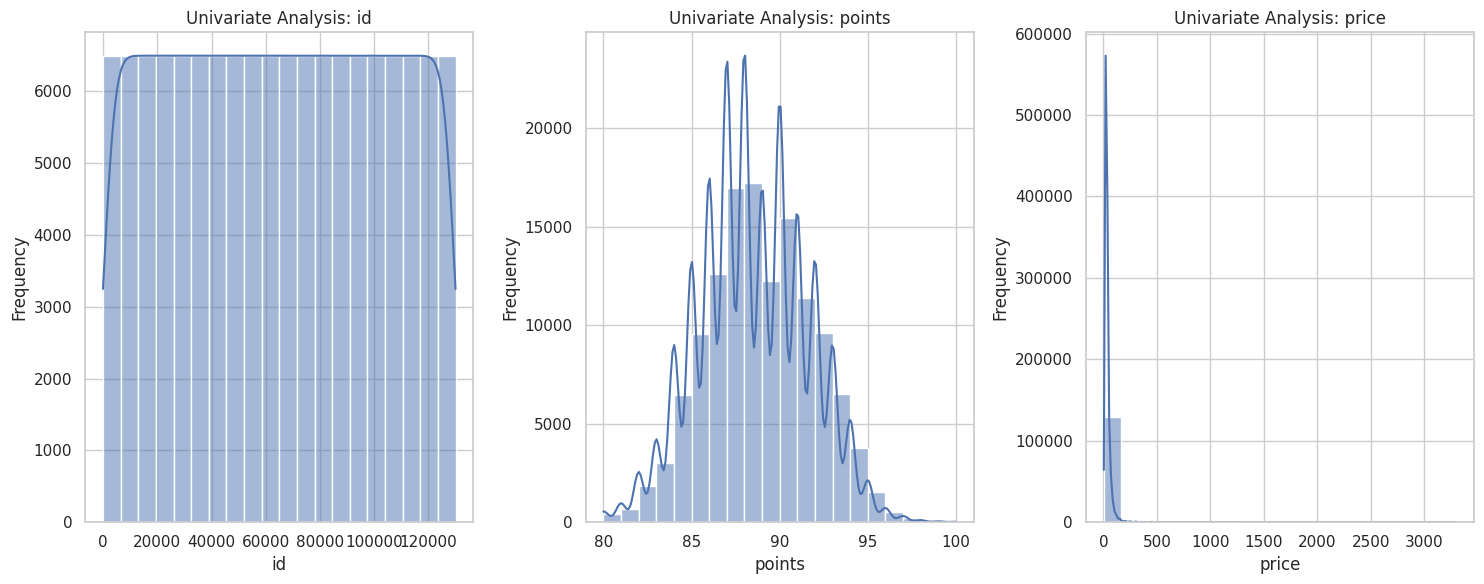

In [19]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df['price'] = df['price'].fillna(df['price'].mean())

# Continue with the plotting as before
numerical_cols = df.select_dtypes(include=[np.number]).columns
num_plots = len(numerical_cols)

# Adjust the figure size according to the number of numerical columns
fig, axes = plt.subplots(nrows=1, ncols=num_plots, figsize=(5 * num_plots, 6))

# Ensure axes is iterable when there's only one numerical column
if num_plots == 1:
    axes = [axes]

for ax, col in zip(axes, numerical_cols):
    sns.histplot(df[col], bins=20, kde=True, ax=ax)
    ax.set_title(f'Univariate Analysis: {col}')
    ax.set_xlabel(col)
    ax.set_ylabel('Frequency')

plt.tight_layout()
plt.show()


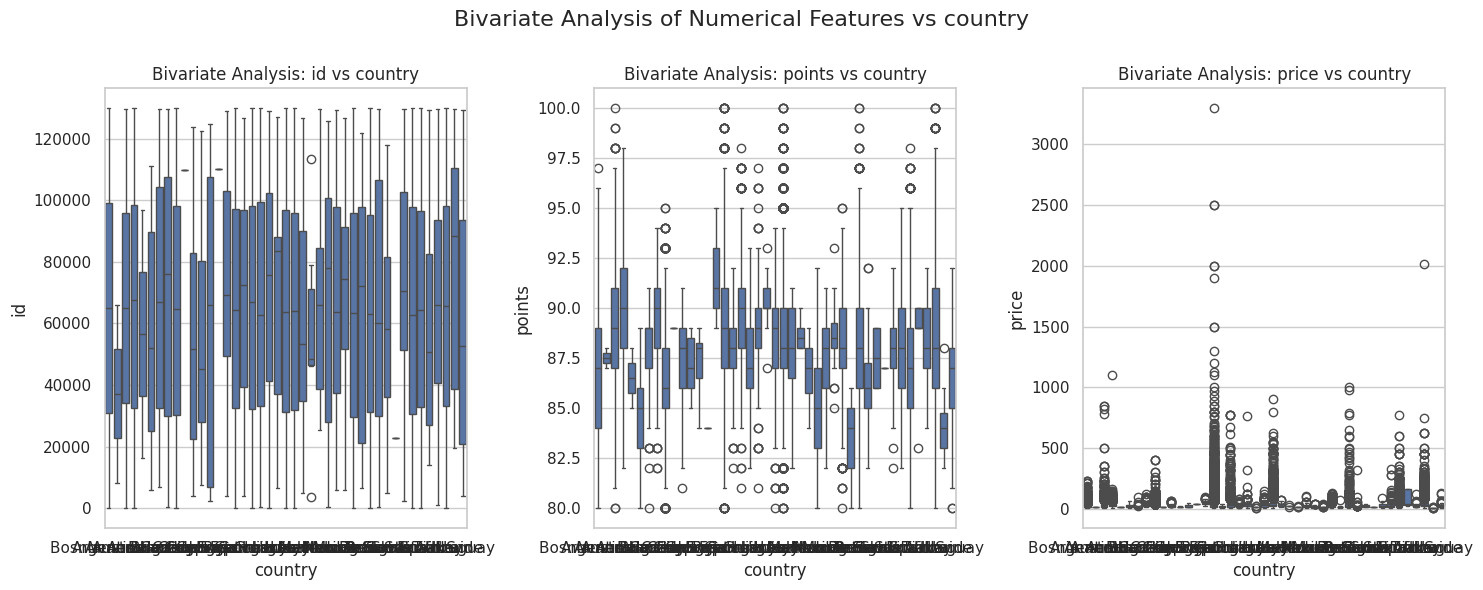

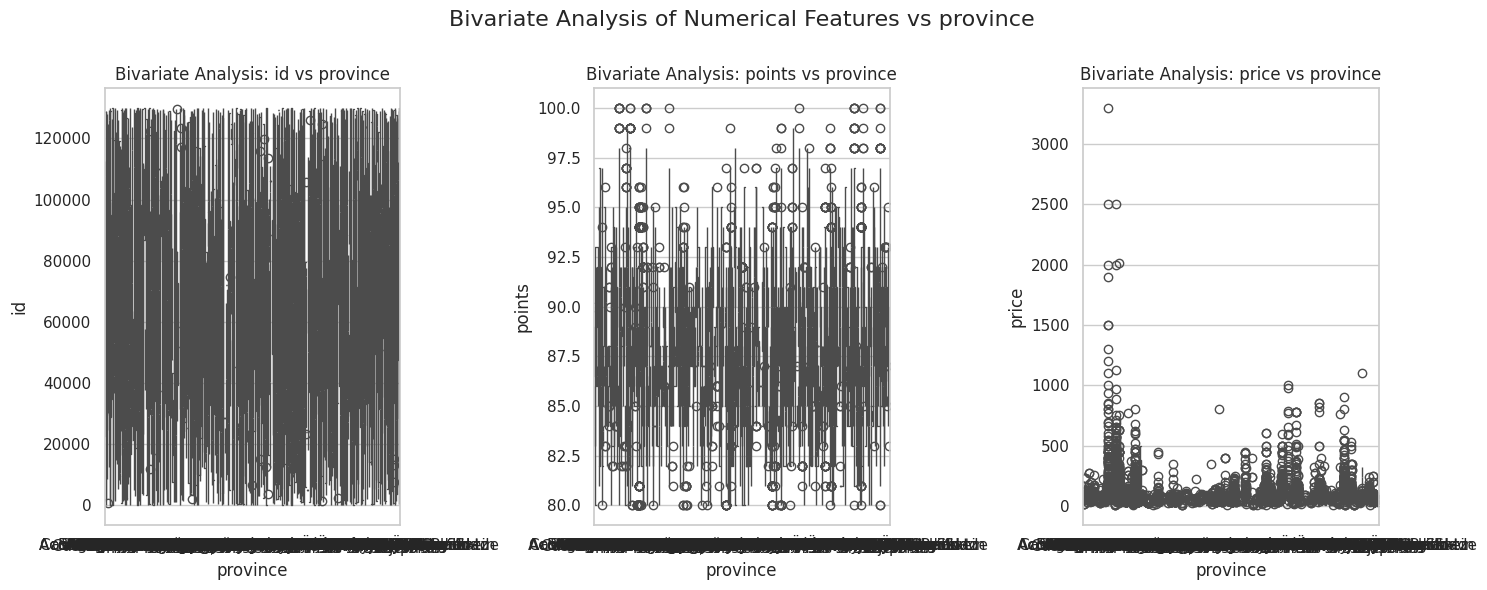

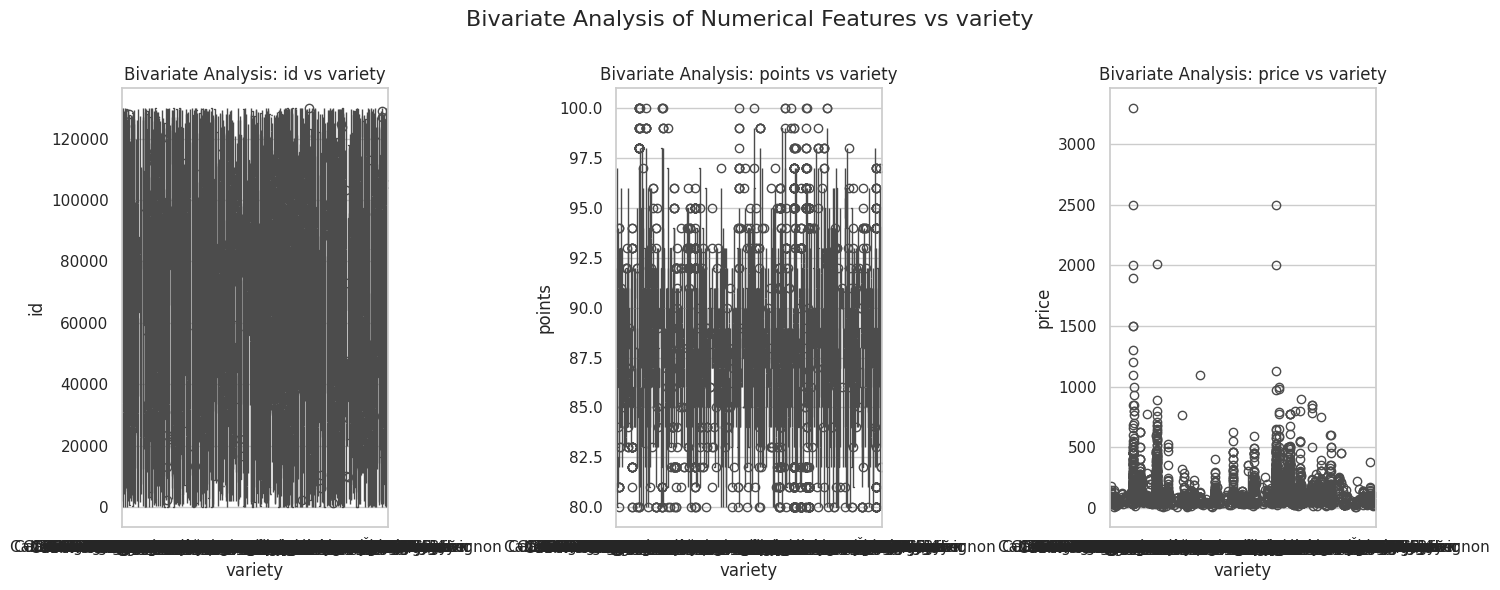

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.


KeyboardInterrupt



In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'points' and 'price' are your main numerical columns
numerical_cols = df.select_dtypes(include=[np.number]).columns
# Select relevant categorical columns from your wine dataset
categorical_cols = ['country', 'province', 'variety', 'winery', 'taster_name']

# Create subplots for each numerical feature against categorical features
for cat_col in categorical_cols:
    num_plots = len(numerical_cols)

    # Create subplots
    fig, axes = plt.subplots(nrows=1, ncols=num_plots, figsize=(5 * num_plots, 6))

    # Ensure axes is iterable when there's only one numerical column
    if num_plots == 1:
        axes = [axes]

    for ax, num_col in zip(axes, numerical_cols):
        sns.boxplot(x=cat_col, y=num_col, data=df, ax=ax)
        ax.set_title(f'Bivariate Analysis: {num_col} vs {cat_col}')
        ax.set_xlabel(cat_col)  # Set xlabel as the categorical column name
        ax.set_ylabel(num_col)

    plt.suptitle(f'Bivariate Analysis of Numerical Features vs {cat_col}', fontsize=16)
    plt.tight_layout()
    plt.subplots_adjust(top=0.85)
    plt.show()


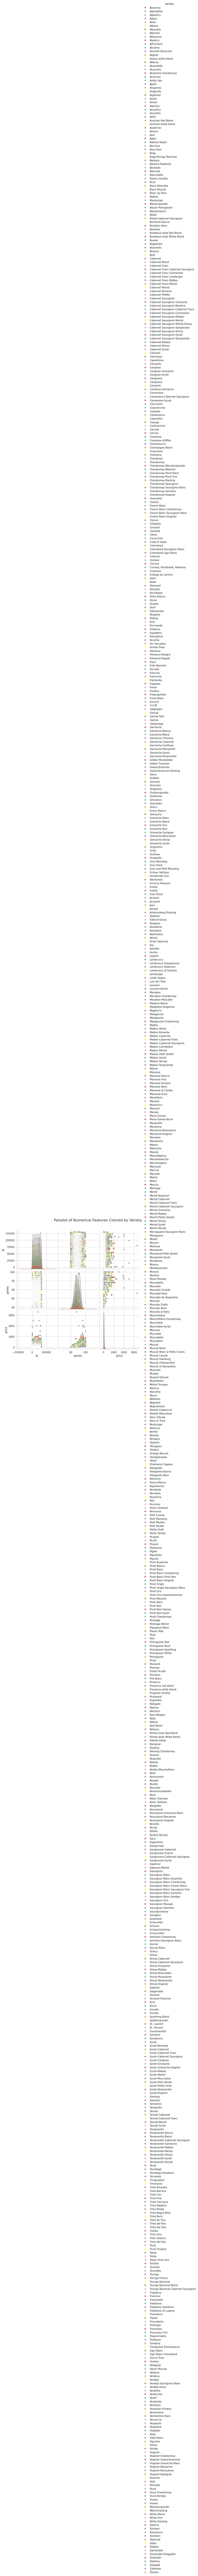

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

# Selecting numerical columns
numerical_cols = df.select_dtypes(include=[np.number]).columns

# Adjust the size of the pairplot to ensure clarity and avoid overlapping
# Increase the aspect ratio and size parameters as needed
pairplot = sns.pairplot(df, vars=numerical_cols, hue='variety', palette='Set1', height=3, aspect=1)

# Increase the top margin to fit the suptitle without overlapping
plt.subplots_adjust(top=0.9)
plt.suptitle('Pairplot of Numerical Features Colored by Variety', fontsize=16)
plt.show()


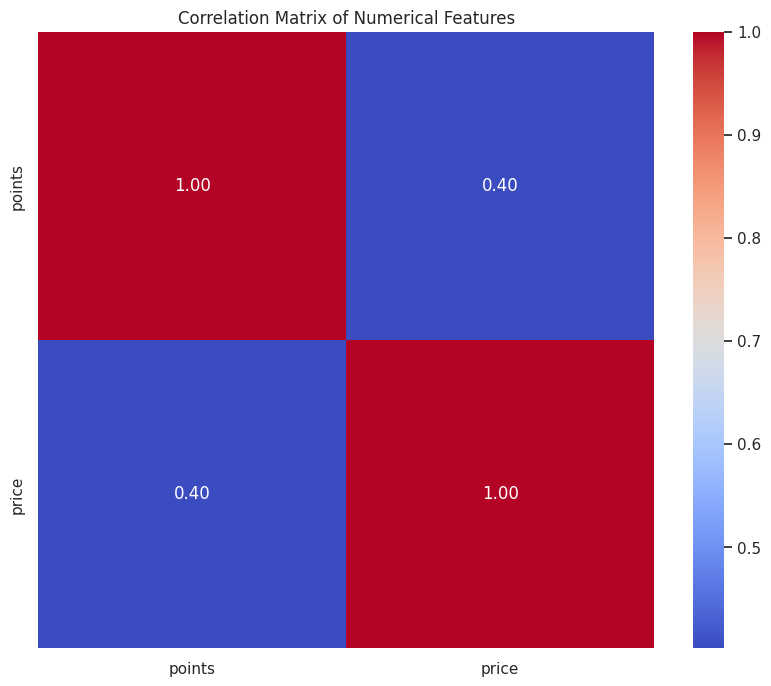

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute the correlation matrix for numerical columns
correlation_matrix = df[['points', 'price']].corr()

# Create a heatmap to visualize the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True, square=True)
plt.title('Correlation Matrix of Numerical Features')
plt.show()


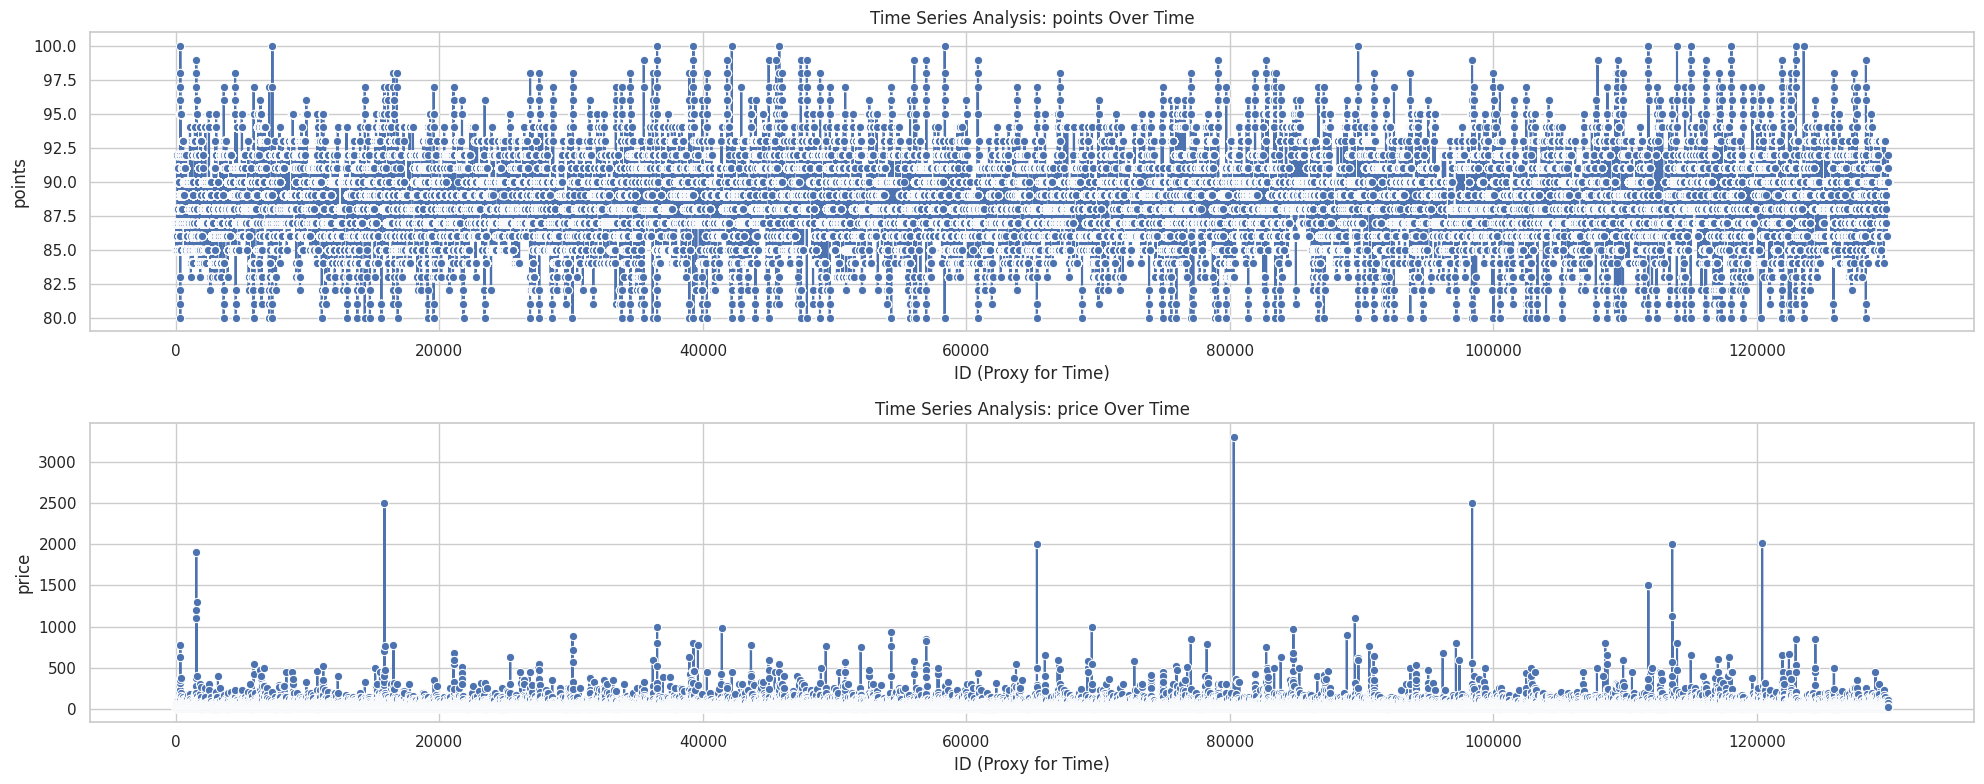

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'id' can be used as a proxy for time (e.g., order of entry might imply time)
time_series_cols = ['points', 'price']

# Create subplots for each numerical feature over 'time' (or 'id' here)
fig, axes = plt.subplots(nrows=len(time_series_cols), ncols=1, figsize=(20, 4 * len(time_series_cols)))

# Loop through each numerical column and create a line plot
for ax, col in zip(axes, time_series_cols):
    sns.lineplot(x='id', y=col, data=df, marker='o', ax=ax)
    ax.set_title(f'Time Series Analysis: {col} Over Time')
    ax.set_xlabel('ID (Proxy for Time)')
    ax.set_ylabel(col)

plt.tight_layout()
plt.show()


In [24]:
import pandas as pd
from scipy.stats import skew, kurtosis

# Assuming 'points' and 'price' are your numerical variables of interest
numerical_vars = ["points", "price"]

# Creating an empty dictionary to store the statistics
statistics = {}

# Calculating various statistics for each numerical variable
for var in numerical_vars:
    stats = {
        "Mean": df[var].mean(),
        "Median": df[var].median(),
        "Mode": df[var].mode()[0],  # mode could return multiple values; taking the first one
        "Standard Deviation": df[var].std(),
        "Minimum": df[var].min(),
        "Maximum": df[var].max(),
        "Range": df[var].max() - df[var].min(),
        "Skewness": skew(df[var]),
        "Kurtosis": kurtosis(df[var])
    }
    statistics[var] = stats

# Convert the dictionary to a DataFrame for a nicer display
statistics_df = pd.DataFrame(statistics)
statistics_df


points        price
Mean                 88.447138    35.363389
Median               88.000000    28.000000
Mode                 88.000000    35.363389
Standard Deviation    3.039730    39.577066
Minimum              80.000000     4.000000
Maximum             100.000000  3300.000000
Range                20.000000  3296.000000
Skewness              0.045920    18.658023
Kurtosis             -0.295998   891.391553

In [25]:
import numpy as np
import pandas as pd
from scipy.stats import trim_mean

# Assuming 'points' and 'price' are the numerical variables of interest
numerical_vars = ["points", "price"]

# Measures of Central Tendency
for var in numerical_vars:
    print(f"Variable: {var}")
    x = df[var].dropna()  # Ensure to drop NA values to avoid errors in calculations
    print(f"Mean: {x.mean()}")
    print(f"Trimmed Mean (10%): {trim_mean(x, 0.1)}")  # Using scipy's trim_mean for 10% trimming
    print(f"Median: {x.median()}")
    print("Quantiles (Deciles):")
    print(x.quantile(np.linspace(0, 1, 11)))  # Deciles from 0% to 100%
    print("Percentiles:")
    print(x.quantile([0.25, 0.5, 0.75]))  # 25th, 50th, and 75th percentiles
    print("\n")


Variable: points
Mean: 88.44713820775404
Trimmed Mean (10%): 88.43487502043722
Median: 88.0
Quantiles (Deciles):
0.0     80.0
0.1     85.0
0.2     86.0
0.3     87.0
0.4     88.0
0.5     88.0
0.6     89.0
0.7     90.0
0.8     91.0
0.9     92.0
1.0    100.0
Name: points, dtype: float64
Percentiles:
0.25    86.0
0.50    88.0
0.75    91.0
Name: points, dtype: float64


Variable: price
Mean: 35.363389129985535
Trimmed Mean (10%): 29.72591100544688
Median: 28.0
Quantiles (Deciles):
0.0       4.0
0.1      13.0
0.2      16.0
0.3      19.0
0.4      23.0
0.5      28.0
0.6      35.0
0.7      36.0
0.8      45.0
0.9      62.0
1.0    3300.0
Name: price, dtype: float64
Percentiles:
0.25    18.0
0.50    28.0
0.75    40.0
Name: price, dtype: float64




In [26]:
import numpy as np
from scipy.stats import skew, kurtosis

# Assuming 'points' and 'price' are the numerical variables of interest
numerical_vars = ["points", "price"]

# Measures of Dispersion
for var in numerical_vars:
    print(f"Variable: {var}")
    x = df[var].dropna()  # Drop NA values for accurate calculations
    print(f"Range: {x.min()} - {x.max()}")
    print(f"Interquartile Range (IQR): {x.quantile(0.75) - x.quantile(0.25)}")
    print(f"Interdecile Range: {x.quantile(0.9) - x.quantile(0.1)}")
    print(f"Variance: {x.var()}")
    print(f"Standard Deviation: {x.std()}")
    print(f"Skewness: {skew(x)}")
    print(f"Kurtosis: {kurtosis(x)}")
    print("\n")


Variable: points
Range: 80 - 100
Interquartile Range (IQR): 5.0
Interdecile Range: 7.0
Variance: 9.239959706521168
Standard Deviation: 3.0397302029162336
Skewness: 0.04592022248056047
Kurtosis: -0.29599796801102096


Variable: price
Range: 4.0 - 3300.0
Interquartile Range (IQR): 22.0
Interdecile Range: 49.0
Variance: 1566.3441567320338
Standard Deviation: 39.57706604502201
Skewness: 18.658023440469247
Kurtosis: 891.3915527214575




Frequency Distribution for points:
 points
88     17207
87     16933
90     15410
86     12600
89     12226
91     11359
92      9613
85      9530
93      6489
84      6480
94      3758
83      3025
82      1836
95      1535
81       692
96       523
80       397
97       229
98        77
99        33
100       19
Name: count, dtype: int64


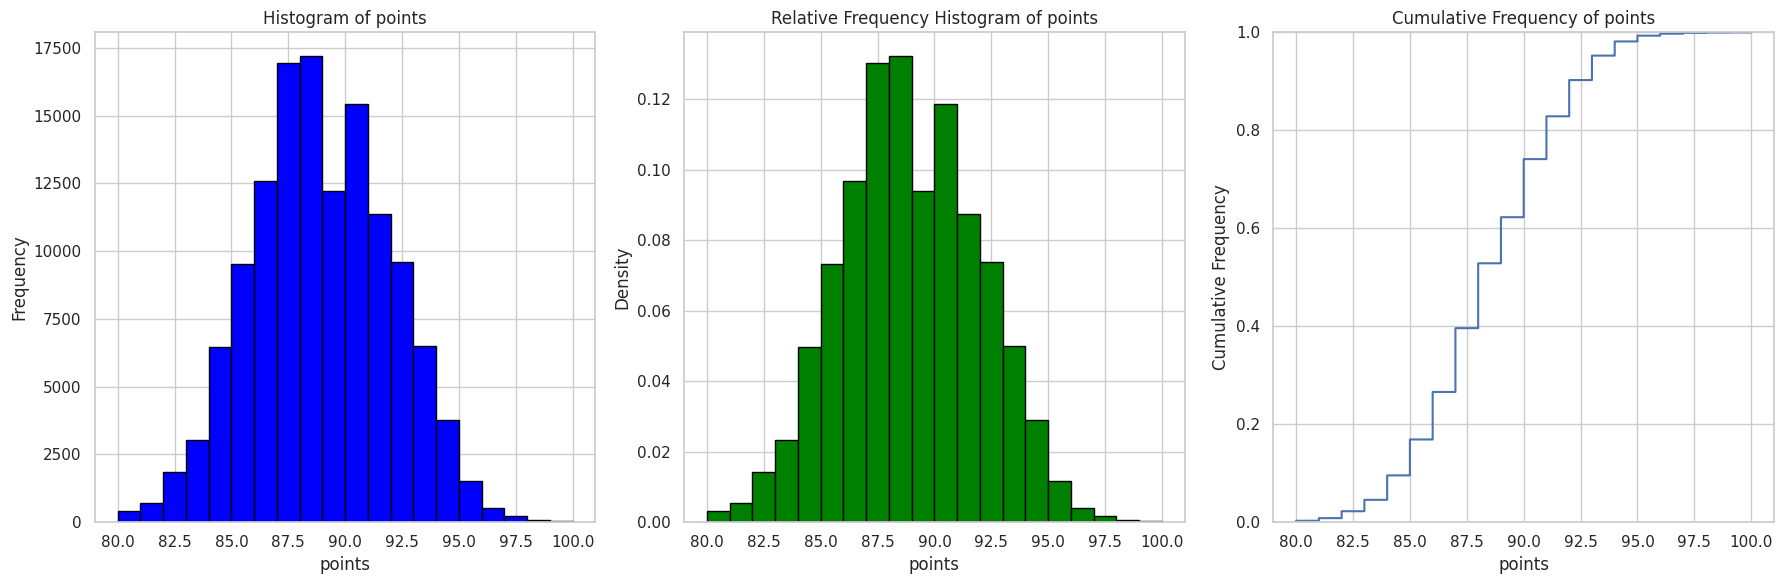

Frequency Distribution for price:
 price
35.363389     8996
20.000000     6940
15.000000     6066
25.000000     5805
30.000000     4951
              ... 
451.000000       1
574.000000       1
764.000000       1
319.000000       1
848.000000       1
Name: count, Length: 391, dtype: int64


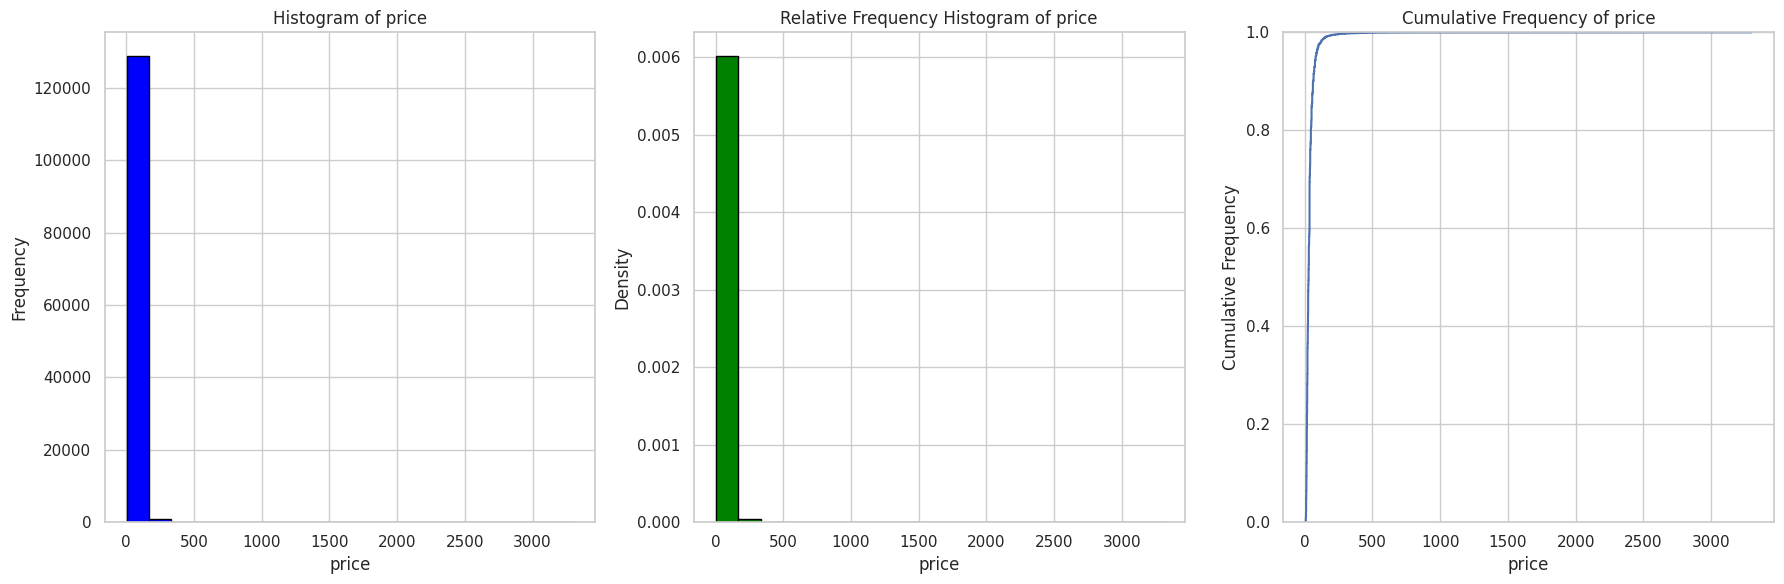

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'points' and 'price' are the numerical variables of interest
numerical_vars = ["points", "price"]

for var in numerical_vars:
    x = df[var].dropna()  # Drop NA to ensure clean plots and calculations
    freq_table = x.value_counts()
    print(f"Frequency Distribution for {var}:\n", freq_table)

    # Create a figure with 1 row and 3 columns for subplots
    fig, axes = plt.subplots(1, 3, figsize=(18, 6))

    # Histogram
    axes[0].hist(x, bins=20, color='blue', edgecolor='black')
    axes[0].set_title(f"Histogram of {var}")
    axes[0].set_xlabel(var)
    axes[0].set_ylabel('Frequency')

    # Relative Frequency Histogram
    axes[1].hist(x, bins=20, density=True, color='green', edgecolor='black')
    axes[1].set_title(f"Relative Frequency Histogram of {var}")
    axes[1].set_xlabel(var)
    axes[1].set_ylabel('Density')

    # Cumulative Frequency Distribution
    sns.ecdfplot(x, ax=axes[2])
    axes[2].set_title(f"Cumulative Frequency of {var}")
    axes[2].set_xlabel(var)
    axes[2].set_ylabel('Cumulative Frequency')

    # Show the plots
    plt.tight_layout()
    plt.show()


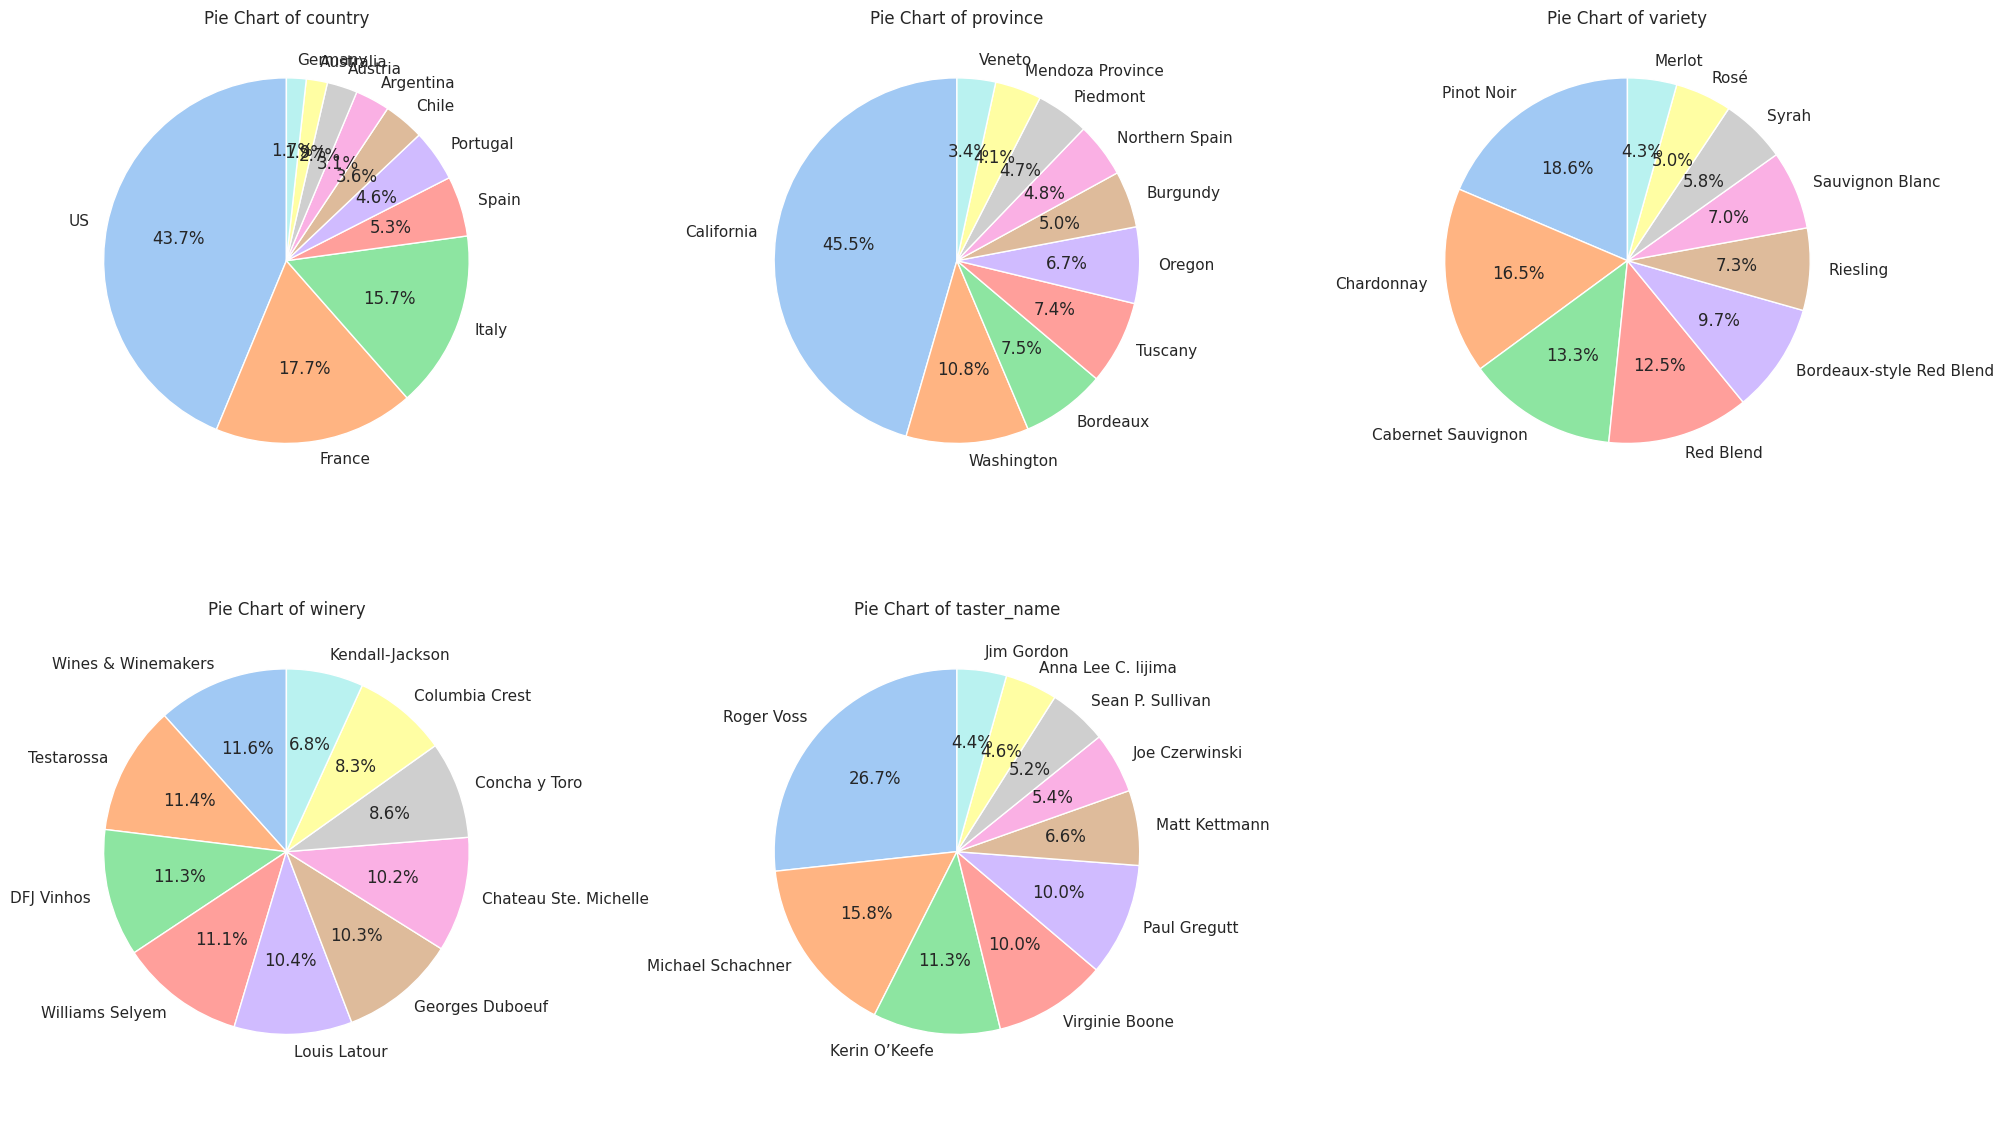

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

categorical_vars = ['country', 'province', 'variety', 'winery', 'taster_name']

fig, axes = plt.subplots(2, 3, figsize=(20, 12))
axes = axes.flatten()

for i, var in enumerate(categorical_vars):
    x = df[var].dropna().value_counts().head(10)
    axes[i].pie(x, labels=x.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('pastel'))
    axes[i].set_title(f"Pie Chart of {var}")

for j in range(i + 1, len(axes)):
    axes[j].axis('off')

plt.subplots_adjust(top=0.9)
plt.tight_layout()
plt.show()


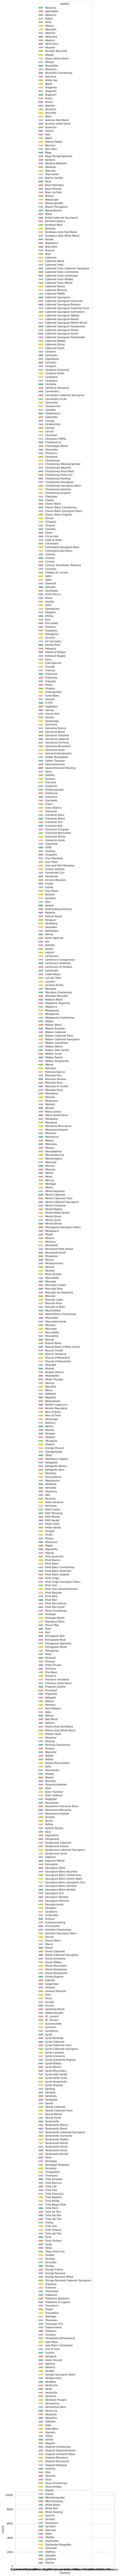

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.countplot(x='country', hue='variety', data=df, palette='Set2')
plt.title("Stacked Bar Plot of Variety by Country")
plt.xlabel("Country")
plt.ylabel("Count")
plt.show()


In [33]:
import pandas as pd

categorical_vars = ['country', 'province', 'variety', 'winery', 'taster_name']

for i in range(len(categorical_vars)):
    for j in range(i+1, len(categorical_vars)):
        table = pd.crosstab(df[categorical_vars[i]], df[categorical_vars[j]])
        print(f"2-way Contingency Table for {categorical_vars[i]} and {categorical_vars[j]}:")
        print(table)
        print("\n")


2-way Contingency Table for country and province:
province                Achaia  Aconcagua Costa  Aconcagua Valley  Aegean  \
country                                                                     
Argentina                    0                0                 0       0   
Armenia                      0                0                 0       0   
Australia                    0                0                 0       0   
Austria                      0                0                 0       0   
Bosnia and Herzegovina       0                0                 0       0   
Brazil                       0                0                 0       0   
Bulgaria                     0                0                 0       0   
Canada                       0                0                 0       0   
Chile                        0               27               116       0   
China                        0                0                 0       0   
Croatia                   

In [34]:
import pandas as pd

numerical_vars = ["points", "price"]
categorical_vars = ['country', 'province', 'variety', 'winery', 'taster_name']

for num_var in numerical_vars:
    for cat_var in categorical_vars:
        table = pd.crosstab(pd.cut(df[num_var], bins=4), df[cat_var])
        print(f"Contingency Table between {num_var} and {cat_var}:")
        print(table)
        print("\n")


Contingency Table between points and country:
country        Argentina  Armenia  Australia  Austria  Bosnia and Herzegovina  \
points                                                                          
(79.98, 85.0]       1435        0        390      132                       1   
(85.0, 90.0]        1840        2       1306     1774                       1   
(90.0, 95.0]         522        0        611     1408                       0   
(95.0, 100.0]          3        0         22       31                       0   

country        Brazil  Bulgaria  Canada  Chile  China  ...  Serbia  Slovakia  \
points                                                 ...                     
(79.98, 85.0]      32        18      16   1614      0  ...       0         0   
(85.0, 90.0]       20       119     147   2498      1  ...      12         1   
(90.0, 95.0]        0         4      94    360      0  ...       0         0   
(95.0, 100.0]       0         0       0      0      0  ...       0 

In [35]:
import pandas as pd

contingency_3way = pd.crosstab([df['country'], df['province']], df['variety'])
print("3-way Contingency Table:")
contingency_3way


3-way Contingency Table:


variety                     Abouriou  Agiorgitiko  Aglianico  Aidani  Airen  \
country   province                                                            
Argentina Mendoza Province         0            0          0       0      0   
          Other                    0            0          0       0      0   
Armenia   Armenia                  0            0          0       0      0   
Australia Australia Other          0            0          0       0      0   
          New South Wales          0            0          0       0      0   
...                              ...          ...        ...     ...    ...   
Uruguay   Juanico                  0            0          0       0      0   
          Montevideo               0            0          0       0      0   
          Progreso                 0            0          0       0      0   
          San Jose                 0            0          0       0      0   
          Uruguay                  0            0          0       0      0   

variety                     Albana  Albanello  Albariño  Albarossa  Aleatico  \
country   province                                                             
Argentina Mendoza Province       0          0         0          0         0   
          Other                  0          0         0          0         0   
Armenia   Armenia                0          0         0          0         0   
Australia Australia Other        0          0         0          0         0   
          New South Wales        0          0         0          0         0   
...                            ...        ...       ...        ...       ...   
Uruguay   Juanico                0          0         0          0         0   
          Montevideo             0          0         3          0         0   
          Progreso               0          0         0          0         0   
          San Jose               0          0         0          0         0   
          Uruguay                0          0         3          0         0   

variety                     ...  Yapincak  Zelen  Zibibbo  Zierfandler  \
country   province          ...                                          
Argentina Mendoza Province  ...         0      0        0            0   
          Other             ...         0      0        0            0   
Armenia   Armenia           ...         0      0        0            0   
Australia Australia Other   ...         0      0        0            0   
          New South Wales   ...         0      0        0            0   
...                         ...       ...    ...      ...          ...   
Uruguay   Juanico           ...         0      0        0            0   
          Montevideo        ...         0      0        0            0   
          Progreso          ...         0      0        0            0   
          San Jose          ...         0      0        0            0   
          Uruguay           ...         0      0        0            0   

variety                     Zierfandler-Rotgipfler  Zinfandel  Zlahtina  \
country   province                                                        
Argentina Mendoza Province                       0          0         0   
          Other                                  0          0         0   
Armenia   Armenia                                0          0         0   
Australia Australia Other                        0          0         0   
          New South Wales                        0          0         0   
...                                            ...        ...       ...   
Uruguay   Juanico                                0          0         0   
          Montevideo                             0          0         0   
          Progreso                               0          0         0   
          San Jose                               0          0         0   
          Uruguay                                0          0       

In [36]:
import pandas as pd

table = pd.crosstab(df['country'], df['province'])
row_profiles = table.div(table.sum(axis=1), axis=0)
print("Row Profiles (Proportions over rows):")
row_profiles


Row Profiles (Proportions over rows):


province                 Achaia  Aconcagua Costa  Aconcagua Valley    Aegean  \
country                                                                        
Argentina               0.00000         0.000000          0.000000  0.000000   
Armenia                 0.00000         0.000000          0.000000  0.000000   
Australia               0.00000         0.000000          0.000000  0.000000   
Austria                 0.00000         0.000000          0.000000  0.000000   
Bosnia and Herzegovina  0.00000         0.000000          0.000000  0.000000   
Brazil                  0.00000         0.000000          0.000000  0.000000   
Bulgaria                0.00000         0.000000          0.000000  0.000000   
Canada                  0.00000         0.000000          0.000000  0.000000   
Chile                   0.00000         0.006038          0.025939  0.000000   
China                   0.00000         0.000000          0.000000  0.000000   
Croatia                 0.00000         0.000000          0.000000  0.000000   
Cyprus                  0.00000         0.000000          0.000000  0.000000   
Czech Republic          0.00000         0.000000          0.000000  0.000000   
Egypt                   0.00000         0.000000          0.000000  0.000000   
England                 0.00000         0.000000          0.000000  0.000000   
France                  0.00000         0.000000          0.000000  0.000000   
Georgia                 0.00000         0.000000          0.000000  0.000000   
Germany                 0.00000         0.000000          0.000000  0.000000   
Greece                  0.01073         0.000000          0.000000  0.000000   
Hungary                 0.00000         0.000000          0.000000  0.000000   
India                   0.00000         0.000000          0.000000  0.000000   
Israel                  0.00000         0.000000          0.000000  0.000000   
Italy                   0.00000         0.000000          0.000000  0.000000   
Lebanon                 0.00000         0.000000          0.000000  0.000000   
Luxembourg              0.00000         0.000000          0.000000  0.000000   
Macedonia               0.00000         0.000000          0.000000  0.000000   
Mexico                  0.00000         0.000000          0.000000  0.000000   
Moldova                 0.00000         0.000000          0.000000  0.000000   
Morocco                 0.00000         0.000000          0.000000  0.000000   
New Zealand             0.00000         0.000000          0.000000  0.000000   
Peru                    0.00000         0.000000          0.000000  0.000000   
Portugal                0.00000         0.000000          0.000000  0.000000   
Romania                 0.00000         0.000000          0.000000  0.000000   
Serbia                  0.00000         0.000000          0.000000  0.000000   
Slovakia                0.00000         0.000000          0.000000  0.000000   
Slovenia                0.00000         0.000000          0.000000  0.000000   
South Africa            0.00000         0.000000          0.000000  0.000000   
Spain                   0.00000         0.000000          0.000000  0.000000   
Switzerland             0.00000         0.000000          0.000000  0.000000   
Turkey                  0.00000         0.000000          0.000000  0.244444   
US                      0.00000         0.000000          0.000000  0.000000   
Ukraine                 0.00000         0.000000          0.000000  0.000000   
Uruguay                 0.00000         0.000000          0.000000  0.000000   

province                Agioritikos       Ahr  Alenquer  Alentejano  Alentejo  \
country                                                                         
Argentina                  0.000000  0.000000   0.00000    0.000000   0.00000   
Armenia                    0.000000  0.000000   0.00000    0.000000   0.00000   
Australia                  0.000000  0.000000   0.00000    0.000000   0.000

In [37]:
import pandas as pd

table = pd.crosstab(df['country'], df['province'])
column_profiles = table.div(table.sum(axis=0), axis=1)
print("Column Profiles (Proportions over columns):")
column_profiles


Column Profiles (Proportions over columns):


province                Achaia  Aconcagua Costa  Aconcagua Valley  Aegean  \
country                                                                     
Argentina                  0.0              0.0               0.0     0.0   
Armenia                    0.0              0.0               0.0     0.0   
Australia                  0.0              0.0               0.0     0.0   
Austria                    0.0              0.0               0.0     0.0   
Bosnia and Herzegovina     0.0              0.0               0.0     0.0   
Brazil                     0.0              0.0               0.0     0.0   
Bulgaria                   0.0              0.0               0.0     0.0   
Canada                     0.0              0.0               0.0     0.0   
Chile                      0.0              1.0               1.0     0.0   
China                      0.0              0.0               0.0     0.0   
Croatia                    0.0              0.0               0.0     0.0   
Cyprus                     0.0              0.0               0.0     0.0   
Czech Republic             0.0              0.0               0.0     0.0   
Egypt                      0.0              0.0               0.0     0.0   
England                    0.0              0.0               0.0     0.0   
France                     0.0              0.0               0.0     0.0   
Georgia                    0.0              0.0               0.0     0.0   
Germany                    0.0              0.0               0.0     0.0   
Greece                     1.0              0.0               0.0     0.0   
Hungary                    0.0              0.0               0.0     0.0   
India                      0.0              0.0               0.0     0.0   
Israel                     0.0              0.0               0.0     0.0   
Italy                      0.0              0.0               0.0     0.0   
Lebanon                    0.0              0.0               0.0     0.0   
Luxembourg                 0.0              0.0               0.0     0.0   
Macedonia                  0.0              0.0               0.0     0.0   
Mexico                     0.0              0.0               0.0     0.0   
Moldova                    0.0              0.0               0.0     0.0   
Morocco                    0.0              0.0               0.0     0.0   
New Zealand                0.0              0.0               0.0     0.0   
Peru                       0.0              0.0               0.0     0.0   
Portugal                   0.0              0.0               0.0     0.0   
Romania                    0.0              0.0               0.0     0.0   
Serbia                     0.0              0.0               0.0     0.0   
Slovakia                   0.0              0.0               0.0     0.0   
Slovenia                   0.0              0.0               0.0     0.0   
South Africa               0.0              0.0               0.0     0.0   
Spain                      0.0              0.0               0.0     0.0   
Switzerland                0.0              0.0               0.0     0.0   
Turkey                     0.0              0.0               0.0     1.0   
US                         0.0              0.0               0.0     0.0   
Ukraine                    0.0              0.0               0.0     0.0   
Uruguay                    0.0              0.0               0.0     0.0   

province                Agioritikos  Ahr  Alenquer  Alentejano  Alentejo  \
country                                                                    
Argentina                       0.0  0.0       0.0         0.0       0.0   
Armenia                         0.0  0.0       0.0         0.0       0.0   
Australia                       0.0  0.0       0.0         0.0       0.0   
Austria                         0.0  0.0       0.0         0.0       0.0   
Bosnia and Herzegovina          0.0  0.0       0.0         0.0       0.0   
Br

In [38]:
import pandas as pd

table = pd.crosstab(df['country'], df['province'])
total = table.sum().sum()
relative_frequencies = table / total
print("Relative Frequencies (Overall proportions):")
relative_frequencies


Relative Frequencies (Overall proportions):


province                  Achaia  Aconcagua Costa  Aconcagua Valley    Aegean  \
country                                                                         
Argentina               0.000000         0.000000          0.000000  0.000000   
Armenia                 0.000000         0.000000          0.000000  0.000000   
Australia               0.000000         0.000000          0.000000  0.000000   
Austria                 0.000000         0.000000          0.000000  0.000000   
Bosnia and Herzegovina  0.000000         0.000000          0.000000  0.000000   
Brazil                  0.000000         0.000000          0.000000  0.000000   
Bulgaria                0.000000         0.000000          0.000000  0.000000   
Canada                  0.000000         0.000000          0.000000  0.000000   
Chile                   0.000000         0.000208          0.000893  0.000000   
China                   0.000000         0.000000          0.000000  0.000000   
Croatia                 0.000000         0.000000          0.000000  0.000000   
Cyprus                  0.000000         0.000000          0.000000  0.000000   
Czech Republic          0.000000         0.000000          0.000000  0.000000   
Egypt                   0.000000         0.000000          0.000000  0.000000   
England                 0.000000         0.000000          0.000000  0.000000   
France                  0.000000         0.000000          0.000000  0.000000   
Georgia                 0.000000         0.000000          0.000000  0.000000   
Germany                 0.000000         0.000000          0.000000  0.000000   
Greece                  0.000038         0.000000          0.000000  0.000000   
Hungary                 0.000000         0.000000          0.000000  0.000000   
India                   0.000000         0.000000          0.000000  0.000000   
Israel                  0.000000         0.000000          0.000000  0.000000   
Italy                   0.000000         0.000000          0.000000  0.000000   
Lebanon                 0.000000         0.000000          0.000000  0.000000   
Luxembourg              0.000000         0.000000          0.000000  0.000000   
Macedonia               0.000000         0.000000          0.000000  0.000000   
Mexico                  0.000000         0.000000          0.000000  0.000000   
Moldova                 0.000000         0.000000          0.000000  0.000000   
Morocco                 0.000000         0.000000          0.000000  0.000000   
New Zealand             0.000000         0.000000          0.000000  0.000000   
Peru                    0.000000         0.000000          0.000000  0.000000   
Portugal                0.000000         0.000000          0.000000  0.000000   
Romania                 0.000000         0.000000          0.000000  0.000000   
Serbia                  0.000000         0.000000          0.000000  0.000000   
Slovakia                0.000000         0.000000          0.000000  0.000000   
Slovenia                0.000000         0.000000          0.000000  0.000000   
South Africa            0.000000         0.000000          0.000000  0.000000   
Spain                   0.000000         0.000000          0.000000  0.000000   
Switzerland             0.000000         0.000000          0.000000  0.000000   
Turkey                  0.000000         0.000000          0.000000  0.000169   
US                      0.000000         0.000000          0.000000  0.000000   
Ukraine                 0.000000         0.000000          0.000000  0.000000   
Uruguay                 0.000000         0.000000          0.000000  0.000000   

province                Agioritikos       Ahr  Alenquer  Alentejano  Alentejo  \
country                                                                         
Argentina                  0.000000  0.000000  0.000000    0.000000  0.000000   
Armenia                    0.000000  0.000000  0.000000    0.000000  0.000000   
Australia                  0.0

In [39]:
from scipy.stats import chi2_contingency

table = pd.crosstab(df['country'], df['province'])
chi2, p, dof, expected = chi2_contingency(table)
print("Chi-square Test Results:")
print(f"Chi2 Statistic: {chi2}, p-value: {p}, Degrees of Freedom: {dof}")
print(f"Expected Frequencies:\n{expected}")
print("\n")


Chi-square Test Results:
Chi2 Statistic: 5456136.000000001, p-value: 0.0, Degrees of Freedom: 17808
Expected Frequencies:
[[1.46257351e-01 7.89789697e-01 3.39317055e+00 ... 1.93059704e+00
  6.43532346e-01 2.34011762e-01]
 [7.69775533e-05 4.15678788e-04 1.78587924e-03 ... 1.01610370e-03
  3.38701235e-04 1.23164085e-04]
 [8.96403609e-02 4.84057949e-01 2.07965637e+00 ... 1.18325276e+00
  3.94417588e-01 1.43424577e-01]
 ...
 [2.09779228e+00 1.13280783e+01 4.86687810e+01 ... 2.76908581e+01
  9.23028605e+00 3.35646765e+00]
 [5.38842873e-04 2.90975152e-03 1.25011547e-02 ... 7.11272593e-03
  2.37090864e-03 8.62148597e-04]
 [4.19527666e-03 2.26544939e-02 9.73304184e-02 ... 5.53776519e-02
  1.84592173e-02 6.71244265e-03]]




<ipython-input-40-c5c43a6e60e0>:5: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x='points', y='price', data=df, palette='Set1')


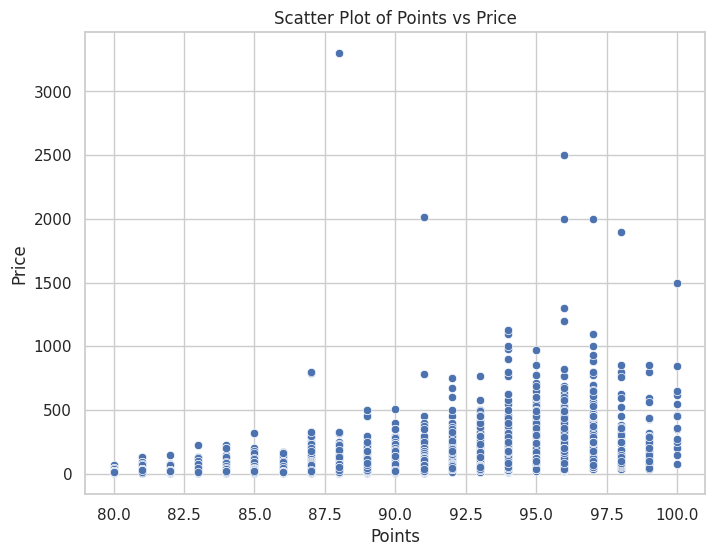

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.scatterplot(x='points', y='price', data=df, palette='Set1')
plt.title('Scatter Plot of Points vs Price')
plt.xlabel('Points')
plt.ylabel('Price')
plt.show()


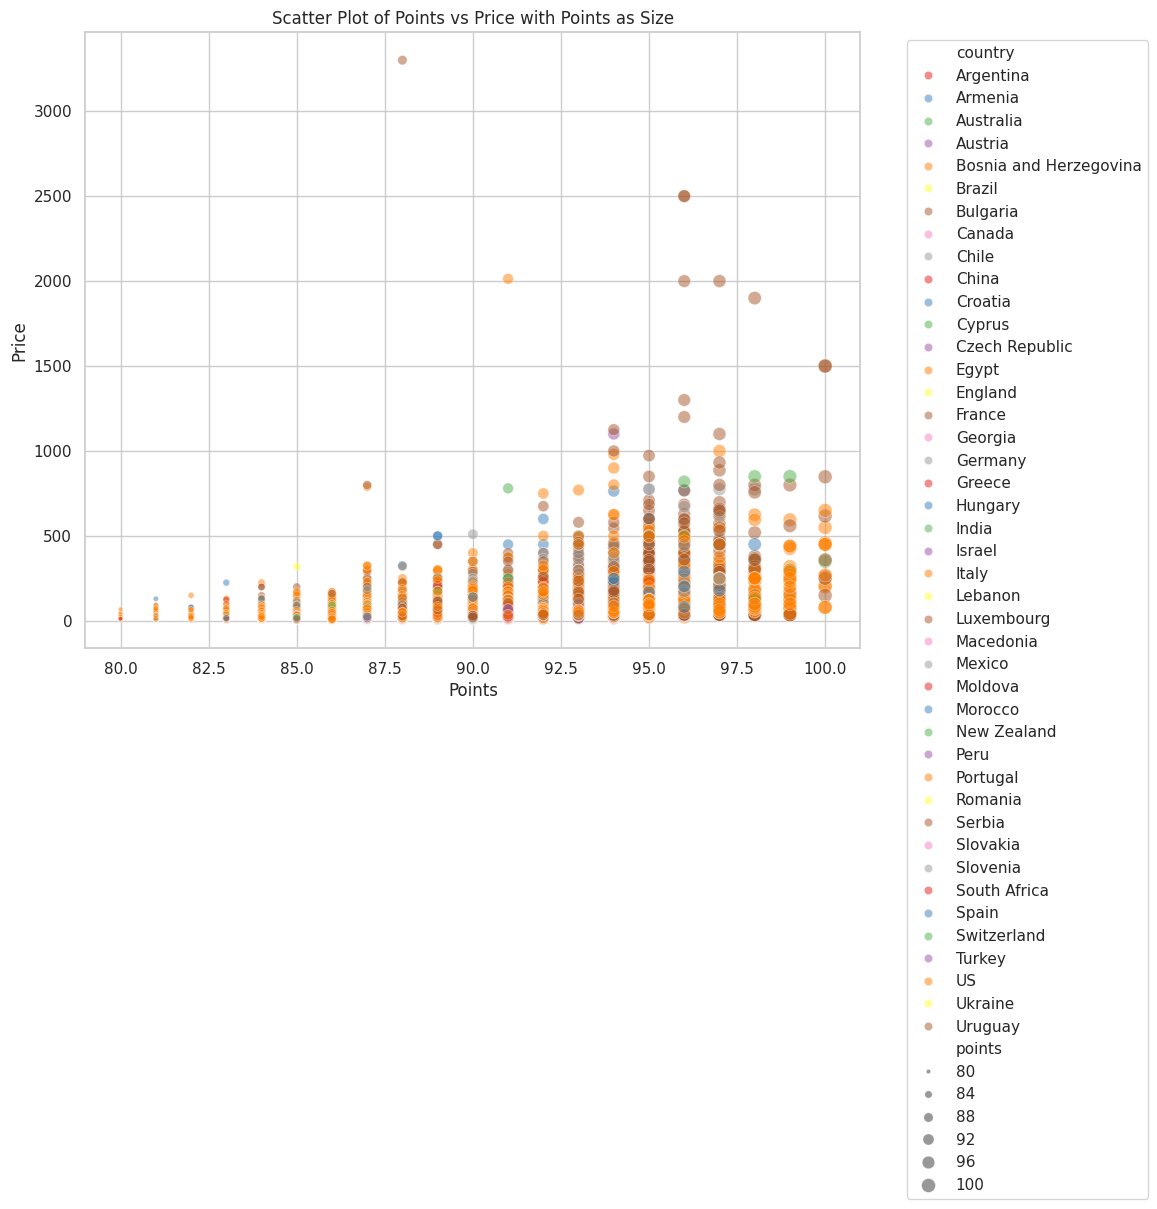

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
# Adding transparency to markers with 'alpha' and reducing size variability
sns.scatterplot(x='points', y='price', data=df, hue='country', palette='Set1',
                size='points', sizes=(10, 100), alpha=0.5)
plt.title('Scatter Plot of Points vs Price with Points as Size')
plt.xlabel('Points')
plt.ylabel('Price')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')  # Moving the legend outside the plot
plt.show()


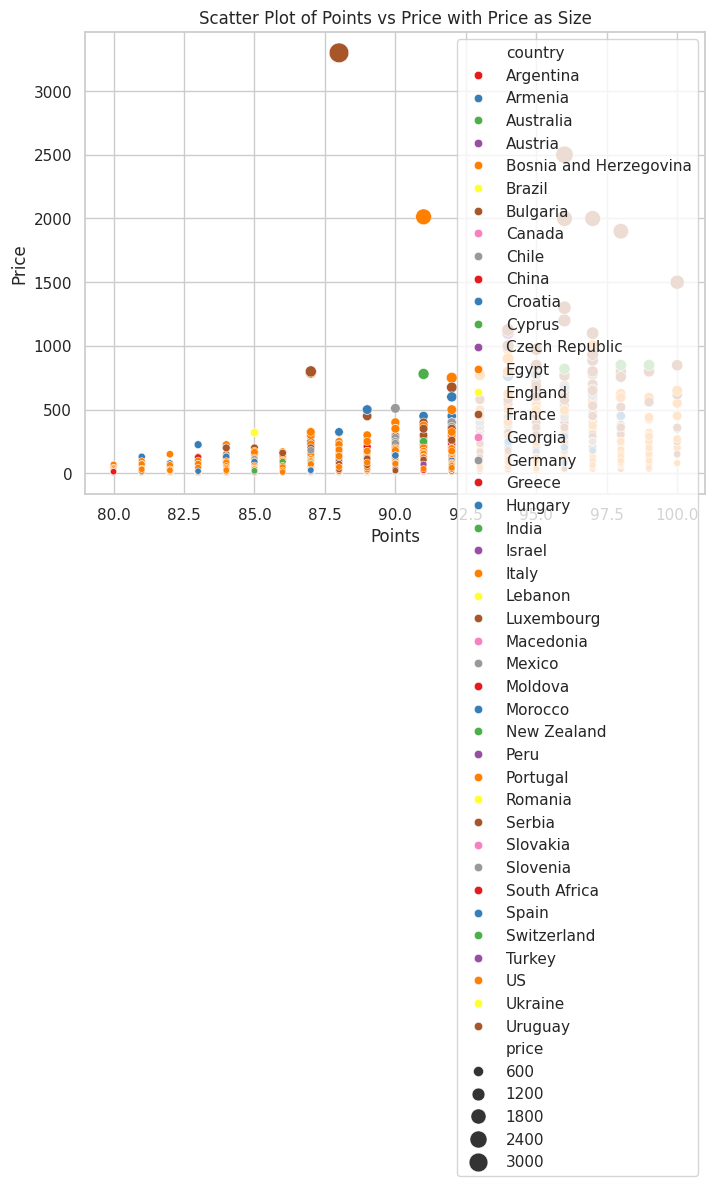

In [43]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.scatterplot(x='points', y='price', data=df, hue='country', size='price', palette='Set1', sizes=(20, 200))
plt.title('Scatter Plot of Points vs Price with Price as Size')
plt.xlabel('Points')
plt.ylabel('Price')
plt.show()


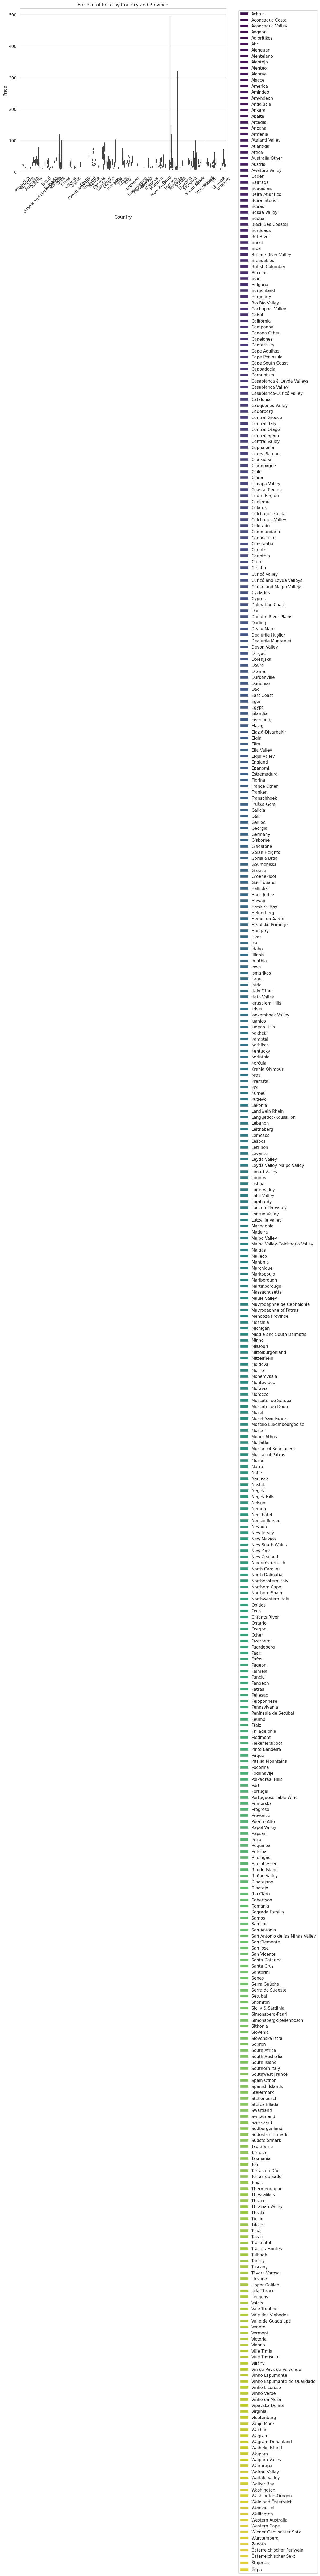

In [44]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
# Using 'country' and 'variety', with 'province' as the hue to add another layer of data.
sns.barplot(x='country', y='price', data=df, hue='province', palette='viridis')
plt.title('Bar Plot of Price by Country and Province')
plt.xlabel('Country')
plt.ylabel('Price')
plt.xticks(rotation=45)  # Rotate x-axis labels to prevent overlap
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')  # Move the legend outside of the plot
plt.show()


<ipython-input-45-b506dda3212f>:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = df.groupby(['points', 'country']).price.mean().reset_index()


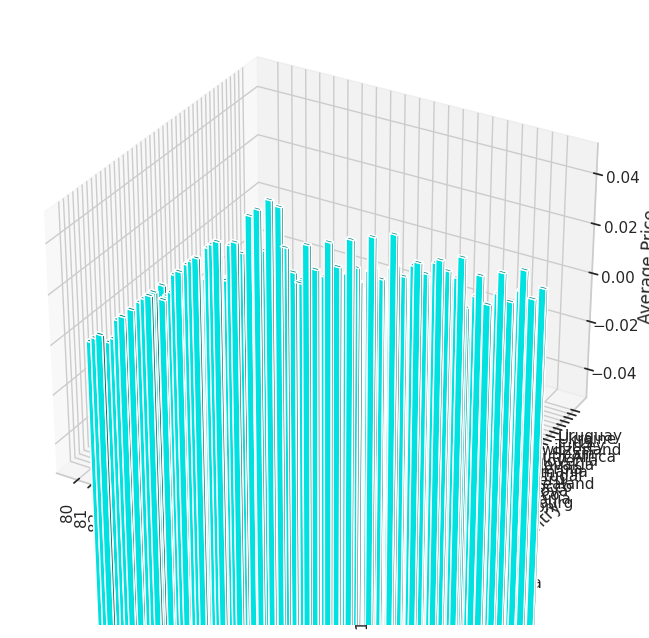

In [45]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

grouped_data = df.groupby(['points', 'country']).price.mean().reset_index()

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

x_pos = np.arange(grouped_data['points'].unique().shape[0])
y_pos = np.arange(grouped_data['country'].unique().shape[0])
x_pos, y_pos = np.meshgrid(x_pos, y_pos)
x_pos = x_pos.flatten()
y_pos = y_pos.flatten()
z_pos = np.zeros_like(x_pos)

points_index = {value: index for index, value in enumerate(sorted(grouped_data['points'].unique()))}
country_index = {value: index for index, value in enumerate(sorted(grouped_data['country'].unique()))}

z_data = grouped_data.apply(lambda row: row['price'], axis=1)

dx = dy = 0.5
dz = z_data

ax.bar3d(x_pos, y_pos, z_pos, dx, dy, dz, color='aqua')

ax.set_xlabel('Points')
ax.set_ylabel('Country')
ax.set_zlabel('Average Price')
ax.set_xticks(np.arange(len(points_index)))
ax.set_xticklabels(list(points_index.keys()), rotation=90)
ax.set_yticks(np.arange(len(country_index)))
ax.set_yticklabels(list(country_index.keys()))

plt.show()


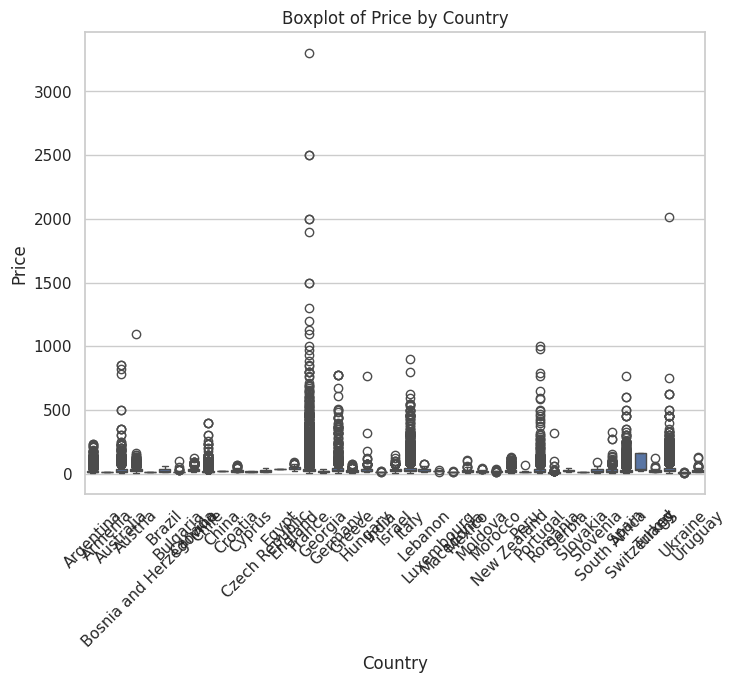

In [46]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.boxplot(x='country', y='price', data=df)
plt.title('Boxplot of Price by Country')
plt.xlabel('Country')
plt.ylabel('Price')
plt.xticks(rotation=45)  # Rotate x-axis labels to improve readability
plt.show()


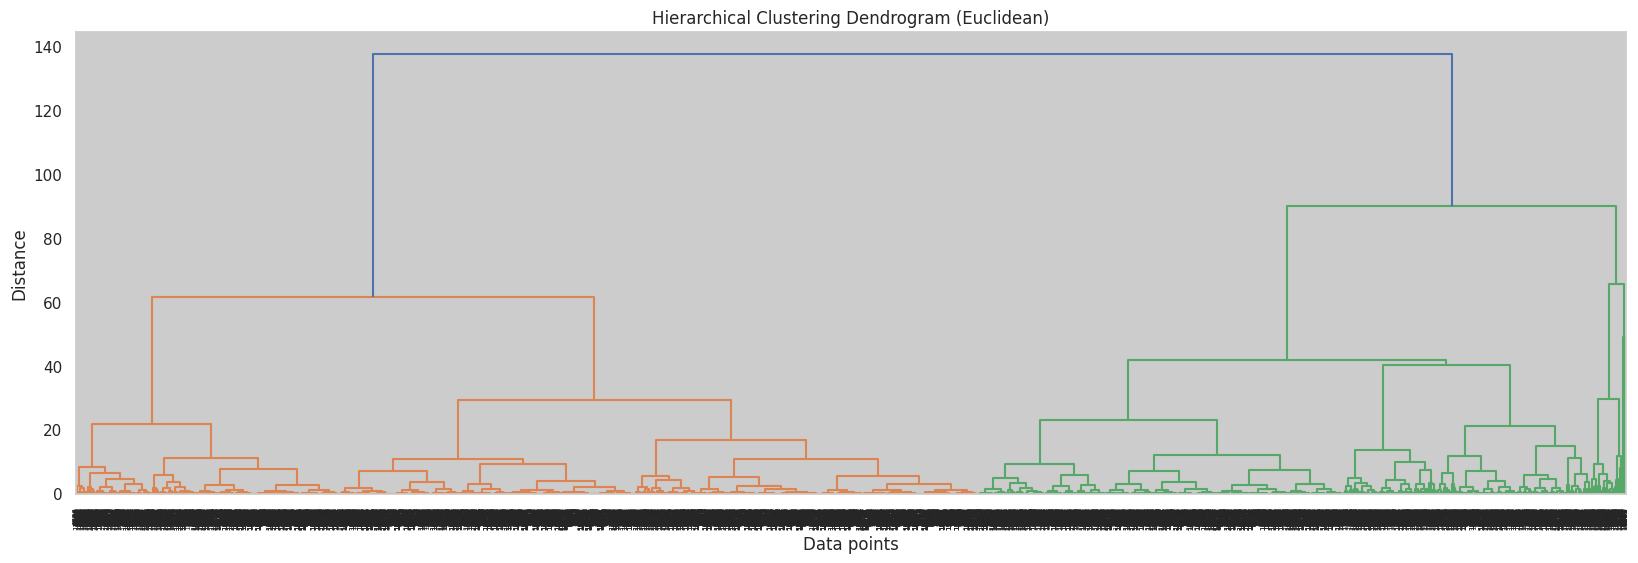

In [8]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Sample a smaller portion of the data if it's very large
data_sample = df.sample(frac=0.1, random_state=42)  # Adjust frac as per your RAM capacity

numerical_columns = ['points', 'price']
data = data_sample[numerical_columns].dropna()

# Standardizing the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

# Hierarchical Clustering using Euclidean distance and Ward's method
Z_euclidean = linkage(data_scaled, method='ward', metric='euclidean')

# Dendrogram for visualizing the hierarchical clustering
plt.figure(figsize=(20, 6))
dendrogram(Z_euclidean)
plt.title('Hierarchical Clustering Dendrogram (Euclidean)')
plt.xlabel('Data points')
plt.ylabel('Distance')
plt.show()


In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Assuming you're using points and price for clustering
numerical_columns = ['points', 'price']
data = df[numerical_columns].dropna()

# Standardizing the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

# Hierarchical Clustering using Manhattan distance
Z_manhattan = linkage(data_scaled, method='complete', metric='cityblock')

# Dendrogram for visualizing the hierarchical clustering
plt.figure(figsize=(10, 7))
dendrogram(Z_manhattan)
plt.title('Hierarchical Clustering Dendrogram using Manhattan Distance')
plt.xlabel('Data points')
plt.ylabel('Distance')
plt.show()


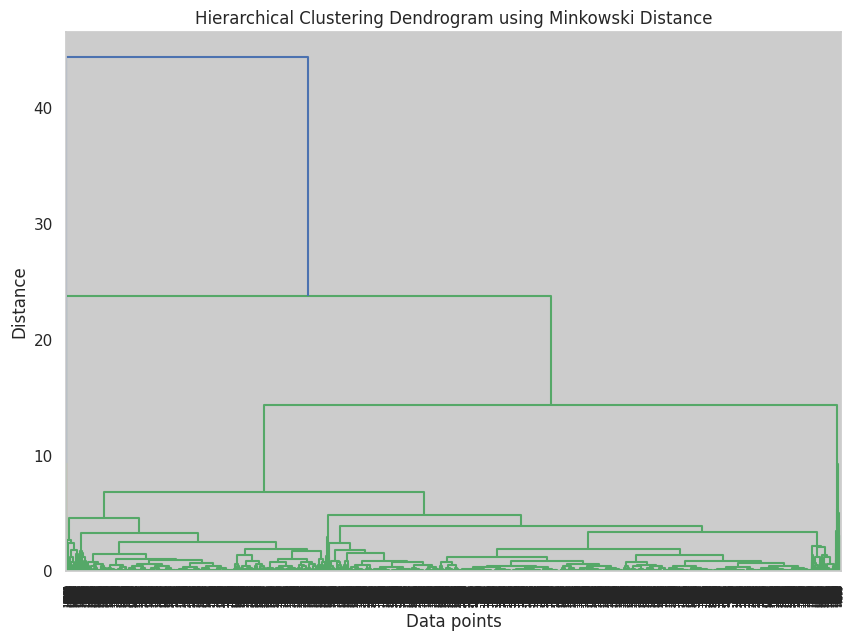

In [6]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt
from sklearn.utils import shuffle

# Sampling a smaller portion of the data, for example, 10%
sampled_df = shuffle(df, random_state=42).sample(frac=0.1)

# Selecting numerical columns: Assuming 'points' and 'price' are being used
numerical_columns = ['points', 'price']
data = sampled_df[numerical_columns].dropna()

# Standardizing the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

# Hierarchical Clustering using Minkowski distance
Z_minkowski = linkage(data_scaled, method='complete', metric='minkowski')

# Dendrogram for visualizing the hierarchical clustering
plt.figure(figsize=(10, 7))
dendrogram(Z_minkowski)
plt.title('Hierarchical Clustering Dendrogram using Minkowski Distance')
plt.xlabel('Data points')
plt.ylabel('Distance')
plt.show()


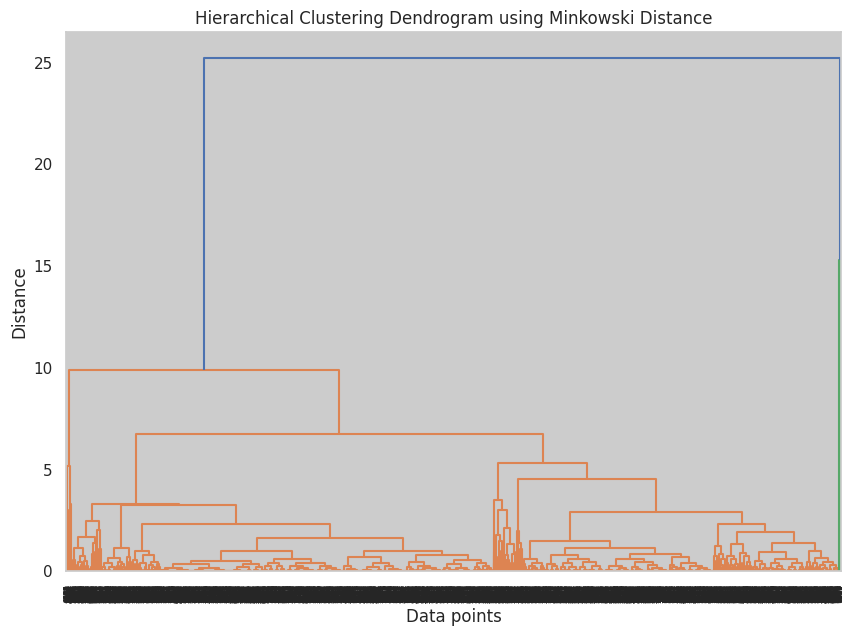

In [5]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt
from sklearn.utils import shuffle

# Sampling a smaller portion of the data for manageability, say 5% of the dataset
data_sample = shuffle(df, random_state=42).sample(frac=0.05)

# Selecting numerical columns: Assuming 'points' and 'price' are being used
numerical_columns = ['points', 'price']
data = data_sample[numerical_columns].dropna()

# Standardizing the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

# Hierarchical Clustering using Minkowski distance
Z_minkowski = linkage(data_scaled, method='complete', metric='minkowski')

# Dendrogram for visualizing the hierarchical clustering
plt.figure(figsize=(10, 7))
dendrogram(Z_minkowski)
plt.title('Hierarchical Clustering Dendrogram using Minkowski Distance')
plt.xlabel('Data points')
plt.ylabel('Distance')
plt.show()


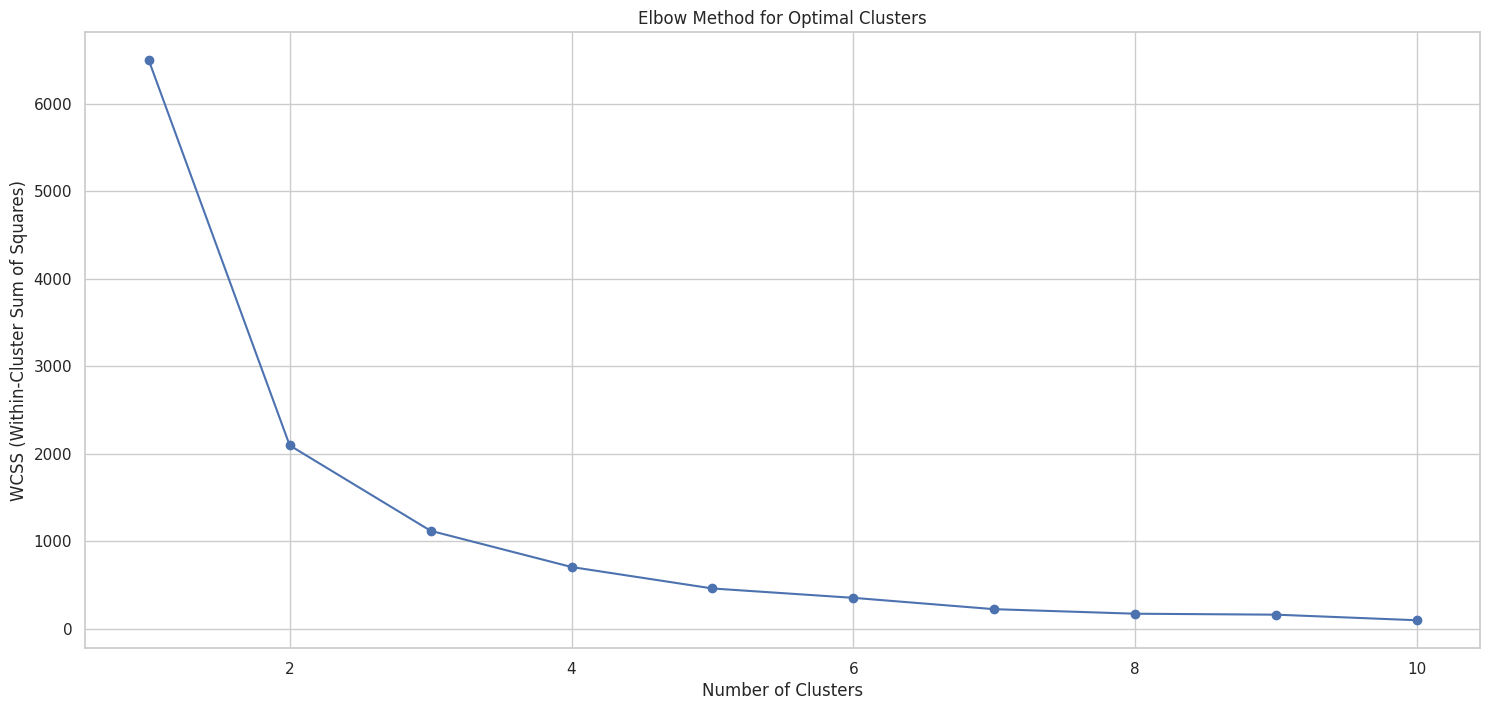

In [7]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.utils import shuffle

# Sample a smaller portion of the data for extreme manageability, say 5% of the dataset
data_sample = shuffle(df, random_state=42).sample(frac=0.05)

# Selecting numerical columns: Using just 'points' or 'price' could be an option
numerical_columns = ['points']  # Simplifying to just one feature to reduce processing load
data = data_sample[numerical_columns].dropna()

# Standardizing the data
scaler = StandardScaler()
# Ensure to access the column as a Series, then convert to numpy array
data_scaled = scaler.fit_transform(data[numerical_columns].values.reshape(-1, 1))  # Correct reshaping for a single feature

# Calculating WCSS for different numbers of clusters
wcss = []
for i in range(1, 11):
    # Reduced n_init to lower computation
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=5, random_state=0)
    kmeans.fit(data_scaled)
    wcss.append(kmeans.inertia_)

# Plotting the Elbow Graph
plt.figure(figsize=(18, 8))
plt.plot(range(1, 11), wcss, marker='o', color='b')
plt.title('Elbow Method for Optimal Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS (Within-Cluster Sum of Squares)')
plt.show()


In [8]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import pandas as pd
from sklearn.utils import shuffle

# Assume data is already sampled and scaled as previously described
numerical_columns = ['points', 'price']  # Assuming these are the features you want to cluster
data_sample = shuffle(df, random_state=42).sample(frac=0.05)  # Adjust the fraction as needed for your dataset size and RAM capacity
data = data_sample[numerical_columns].dropna()

# Standardizing the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

# Selecting the optimal number of clusters based on the Elbow method
optimal_clusters = 5

# Train K-Means model
kmeans = KMeans(n_clusters=optimal_clusters, init='k-means++', max_iter=300, n_init=10, random_state=0)
kmeans.fit(data_scaled)

# Optionally, you can output the cluster centers or the labels
print("Cluster centers:\n", kmeans.cluster_centers_)
print("Cluster labels:\n", kmeans.labels_)


Cluster centers:
 [[ 1.35192953  2.01762079]
 [-1.20740118 -0.41823241]
 [-0.05925323 -0.25158312]
 [ 2.15864793  8.92928164]
 [ 1.04466654  0.22727247]]
Cluster labels:
 [1 2 4 ... 2 1 4]


In [10]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.utils import shuffle

# Sample a manageable portion of the data, if not already done
data_sample = shuffle(df, random_state=42).sample(frac=0.05)

# Selecting numerical columns and dropping NA values
numerical_columns = ['points', 'price']
data = data_sample[numerical_columns].dropna()

# Standardizing the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

# Optimal number of clusters found from previous analysis
optimal_clusters = 5

# Train K-Means model
kmeans = KMeans(n_clusters=optimal_clusters, init='k-means++', max_iter=300, n_init=10, random_state=0)
kmeans.fit(data_scaled)

# Assign cluster labels to the data frame (data_sample must have the same number of rows as data_scaled)
data_sample = data_sample.loc[data.index]  # Align data_sample to the rows used in data_scaled
data_sample['Cluster'] = kmeans.labels_

# Optionally add the cluster labels back to the main DataFrame if required
# This assumes df has a stable index that hasn't been reset or altered
df.loc[data_sample.index, 'Cluster'] = data_sample['Cluster']


In [11]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Assuming we're working with numerical columns like 'points' and 'price'
numerical_columns = ['points', 'price']
data = df[numerical_columns].dropna()

# Standardizing the data to prepare for PCA
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

# Apply PCA for dimensionality reduction to 2 components
pca = PCA(n_components=2)
pca_components = pca.fit_transform(data_scaled)

# You can create a new DataFrame with these two principal components if you want to use them for further analysis
pca_df = pd.DataFrame(data=pca_components, columns=['Principal Component 1', 'Principal Component 2'])

# If you want to add these components back to the original data_sample for visualization or analysis:
data['Principal Component 1'] = pca_components[:, 0]
data['Principal Component 2'] = pca_components[:, 1]

print("PCA Components:\n", pca_df.head())


PCA Components:
    Principal Component 1  Principal Component 2
0              -0.681251              -0.020766
1              -0.698488              -0.038003
2              -0.715725              -0.055241
3               0.180611               0.841096
4              -0.681251              -0.020766


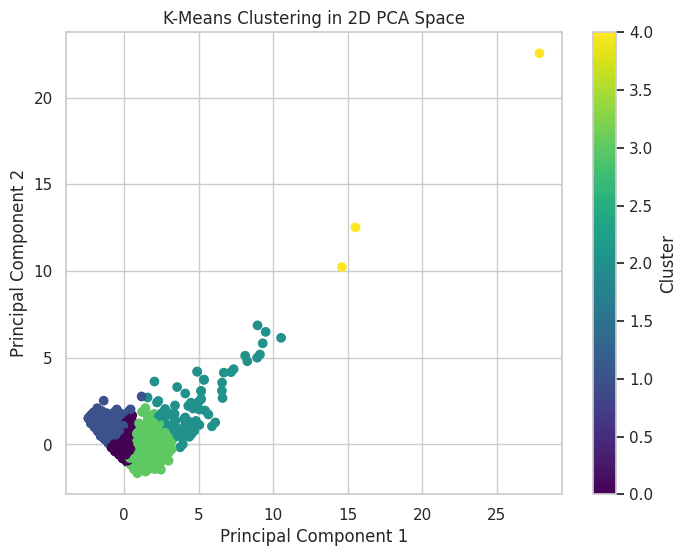

In [14]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.utils import shuffle

# Assuming we're starting afresh with the original DataFrame
data_sample = shuffle(df, random_state=42).sample(frac=0.05)  # Sample the data

# Selecting numerical columns
numerical_columns = ['points', 'price']
data = data_sample[numerical_columns]

# Drop NA values before scaling and clustering
data = data.dropna()

# Standardizing the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

# Optimal number of clusters
optimal_clusters = 5

# Train K-Means model
kmeans = KMeans(n_clusters=optimal_clusters, init='k-means++', max_iter=300, n_init=10, random_state=0)
kmeans.fit(data_scaled)

# Apply PCA for dimensionality reduction to 2 components
pca = PCA(n_components=2)
pca_components = pca.fit_transform(data_scaled)

# Ensure the DataFrame for labeling is the same as was used for clustering
data['Cluster'] = kmeans.labels_  # Directly use the DataFrame that was used for kmeans

# Visualizing the results
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(pca_components[:, 0], pca_components[:, 1], c=data['Cluster'], cmap='viridis')
plt.title('K-Means Clustering in 2D PCA Space')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster')
plt.show()


In [16]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Selecting the numerical variable 'points' and the target 'price'
numerical_vars = ['points']  # Adjust as needed with more features
X = df[numerical_vars]
y = df['price']

# Option 1: Drop rows where 'price' is NaN
X = X[y.notna()]
y = y[y.notna()]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create a Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predicting on the test set
y_pred = model.predict(X_test)

# Evaluating the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R^2 Score:", r2)


Mean Squared Error: 1175.300154245775
R^2 Score: 0.19998187195876327
